In [4]:
import pandas as pd
import numpy as np
import plotly.express as plt
from sklearn.datasets import make_regression

In [34]:
X,y=make_regression(n_samples=100,n_features=2,n_targets=1,n_informative=2,noise=50)

In [35]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],"target":y})

In [36]:
df.head()

,feature1,feature2,target
0,-0.077815,-1.598123,-82.562105
1,0.854410,-0.530596,33.022514
2,1.627203,-0.389669,110.317044
3,1.255453,0.344096,-21.557584
4,-0.390945,-0.756621,-11.980704


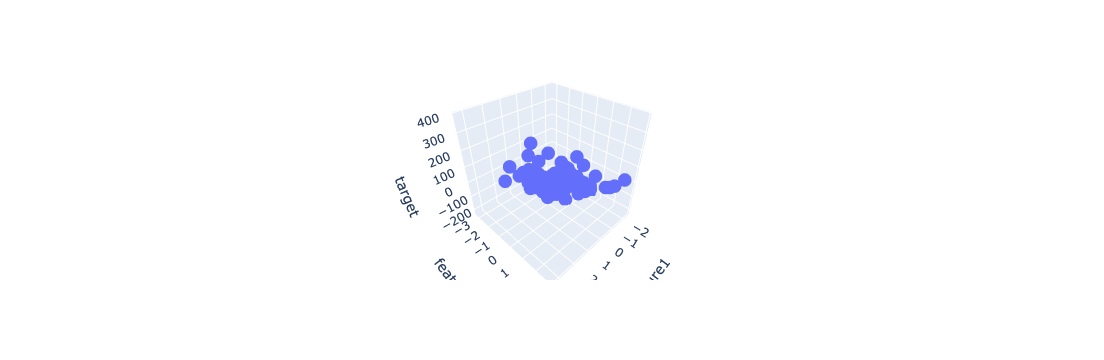

In [38]:
fig=plt.scatter_3d(df,x="feature1",y="feature2",z='target')
fig.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred=model.predict(X_test)

In [45]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))


MAE 32.46388946669184
MSE 1941.8088610588206
R2 0.7891547596451652


In [46]:
model.coef_

array([79.83223283, 53.40689441])

In [47]:
model.intercept_

-1.3403890299003036

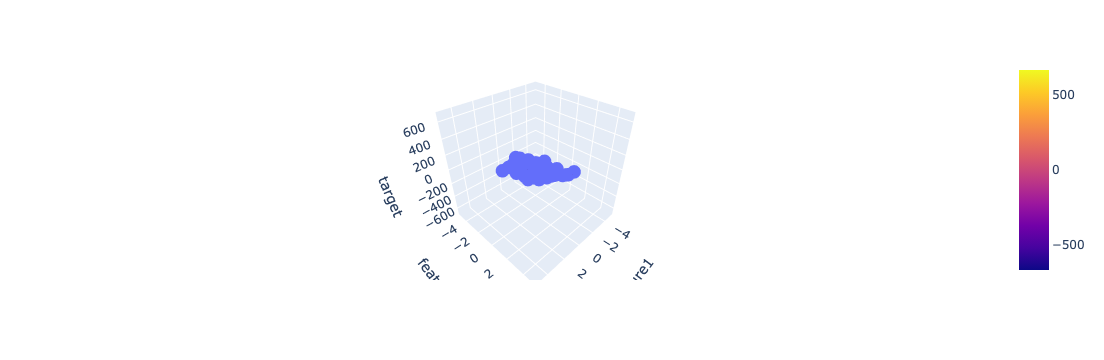

In [52]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
# not done by me trying to visulize using chatgpt
# Assuming you have a dataframe 'df' with columns 'feature1', 'feature2', and 'target'

# Create a meshgrid
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

# Stack the grids vertically to form the 'final' input for prediction
final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

# Assuming 'model' is your trained model
z_final = model.predict(final).reshape(10, 10)

# Use the calculated z values for the surface plot
z = z_final

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

# Add a 3D surface plot
fig.add_trace(go.Surface(x=x, y=y, z=z))

# Show the plot
fig.show()
